In [1]:
import numpy as np
import pandas as pd
import numpy.linalg as la
import csv
import matplotlib.pyplot as plt

In [2]:
def scaleFeatures(vector):
    max_val = max(vector)
    min_val = min(vector)
    for i in range(len(vector)):
        vector[i] = (vector[i]-min_val)/(max_val-min_val)
    return vector

In [3]:
def createDataSets():
    # Specify the path to your CSV file
    csv_file_path = 'Housing.csv'

    # Initialize lists to store the labels, row vector, and the remaining float values
    Features_names = []
    Y_train = []
    X_train = []

    # Open the CSV file
    with open(csv_file_path, mode='r') as file:
        # Create a CSV reader object
        csv_reader = csv.reader(file)
        
        # Read the first row as labels
        Features_names = next(csv_reader)
        
        # Iterate over the remaining rows in the CSV file
        for row in csv_reader:
            Y_train.append(float(row[0]))  # Append the first column value to the row vector and convert to float
            trainEg = [float(value) for value in row[1:]]  # Convert the remaining values to floats
            X_train.append(trainEg)

    # Convert lists to numpy arrays
    Y_train = np.array(Y_train)
    Y_train = scaleFeatures(Y_train)
    X_train = np.array(X_train)
    col1=[]
    for i in range(len(X_train)):
        col1.append(X_train[i][0])
    col1 = np.array(col1)
    col1 = scaleFeatures(col1)
    for i in range(len(X_train)):
        X_train[i][0] = col1[i]
    return Y_train,X_train


In [4]:
def prediction(X_pred, w,b):
    return np.dot(w, X_pred) + b

In [5]:
def costFunction(w,b,X_train,Y_train):
    m= len(Y_train)
    cost = 0
    for i in range(m):
        Y_ = np.dot(w, X_train[i]) + b
        cost += (Y_ - Y_train[i]) ** 2
    return cost / (2 * m)

In [6]:
def gradientDescent(X_train, Y_train, w,b):
    m = len(Y_train)
    dw = np.zeros(w.shape)
    db = 0.0
    for i in range(m):
        f = np.dot(w, X_train[i]) + b
        dw_i = (f - Y_train[i]) * X_train[i]
        db_i = (f - Y_train[i])
        dw += dw_i
        db += db_i
    dw /= m
    db /= m
    return dw, db

In [7]:
def optimize(num_iters, X_train, Y_train, learning_rate):
    n=X_train.shape[1]
    w = np.ones(n, dtype=float)
    b = 1.0
    iterations =[]
    costs =[]
    for k in range(num_iters):
        dw, db = gradientDescent(X_train, Y_train, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db
        if k % 100 == 0:
            iterations.append(k)
            thiscost = costFunction(w, b, X_train, Y_train)
            costs.append(thiscost)

            print(f"Iteration {k}: Cost {thiscost}")
    return w, b , iterations, costs

In [8]:
def model():
    Y_train, X_train = createDataSets()
    w, b, number,costs= optimize(1000, X_train, Y_train, 0.1)
    #X_predict = [0.5432098,3,2,2,1,0,0,0,1,2,0,1]  # add values to make prediction from
    # prediction_val = prediction(X_predict, w, b)
    # print(prediction_val)
    print(w,b)
    plt.plot(number,costs)
    plt.show()

Iteration 0: Cost 30.359509700314703
Iteration 100: Cost 0.018429852266845147
Iteration 200: Cost 0.009798440341319761
Iteration 300: Cost 0.006861850529038553
Iteration 400: Cost 0.005515983424466104
Iteration 500: Cost 0.004873638289062169
Iteration 600: Cost 0.004557821214054293
Iteration 700: Cost 0.004397161805768921
Iteration 800: Cost 0.004312060457339445
Iteration 900: Cost 0.00426487890906533
[0.37595975 0.0060978  0.08154355 0.04013198 0.02426979 0.02398819
 0.03253712 0.09120454 0.07302396 0.02144867 0.05358017 0.03481935] -0.13155726878217056


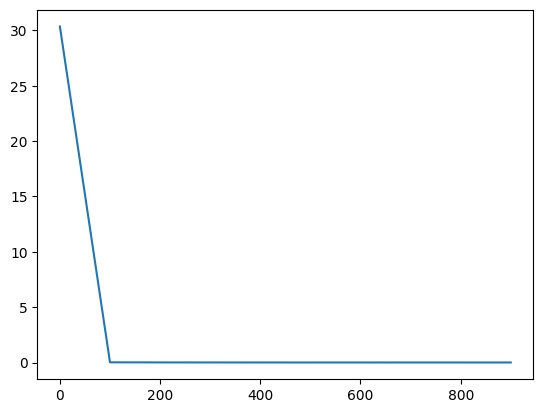

In [9]:
model()